<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/Suguru_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developed by Alireza Soroudi
alireza.soroudi@gmail.com

Linkedin News letter : https://www.linkedin.com/newsletters/optimization-in-open-source-6874020019009859585/

Git hub: https://github.com/OptimizationExpert/Pyomo

Problem description:
https://www.linkedin.com/pulse/suguru-puzzle-cp-alireza-soroudi-sgzke



#  Solving Suguru (Tectonic) puzzles
https://community.wolfram.com/groups/-/m/t/1077888


In [23]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import numpy as np
from random import randint
import random
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt # Data visualization
from matplotlib.patches import Rectangle
from google.colab import files

import matplotlib.patches as patches

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
tectons  = [
    {(1, 1), (1, 2), (2, 1), (2, 2), (3, 1)},
    {(1, 3), (1, 4), (1, 5), (2, 3), (2, 4)},
    {(1, 6), (1, 7), (2, 5), (2, 6), (3, 5)},
    {(1, 8), (2, 7), (2, 8), (3, 6), (3, 7)},
    {(1, 9), (2, 9), (3, 9), (4, 8), (4, 9)},
    {(3, 8)},
    {(5, 8)},
    {(5, 9), (6, 8), (6, 9), (7, 8), (7, 9)},
    {(4, 6), (4, 7), (5, 6), (5, 7), (6, 7)},
    {(5, 5), (6, 5), (6, 6), (7, 4), (7, 5)},
    {(5, 2), (5, 3), (6, 3), (6, 4), (7, 3)},
    {(3, 3), (3, 4), (4, 4), (4, 5), (5, 4)},
    {(3, 2), (4, 1), (4, 2), (4, 3), (5, 1)},
    {(6, 1), (6, 2), (7, 1), (7, 2)},
    {(7, 6), (7, 7)}
]

given = {
    (1, 1): 1,
    (2, 2): 2,
    (3, 1): 4,
    (1, 4): 1,
    (2, 8): 3,
    (3, 3): 4,
    (3, 9): 4,
    (4, 4): 1,
    (5, 1): 4,
    (5, 3): 5,
    (5, 5): 4,
    (5, 7): 5,
    (6, 8): 3,
    (7, 5): 2,
    (7, 9): 5
}

cells, loc2cells = {}, {}
counter =0
for x in range(1,10):
  for y in range(1,8):
    counter+=1
    cells[counter]=(x,y)
    loc2cells[x,y]= counter



projects = {pr:[] for pr in range(1,1+len(tectons))}
counter = 0
for all_cels in tectons:
  pr = tectons.index(all_cels)+1
  for project in all_cels:
    (y,x) = project
    projects[pr]+= [loc2cells[x,y]]


cell2proj = {cell:pr for pr,cells in projects.items() for cell in cells }

In [25]:
KOLORS = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
            "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
            "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
            "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
            "#8c6d31", "#9c9ede", "#637939", "#e7cb94", "#b5cf6b",
            "#cedb9c", "#c7c7c7", "#bd9e39", "#e7969c", "#7b4173"]

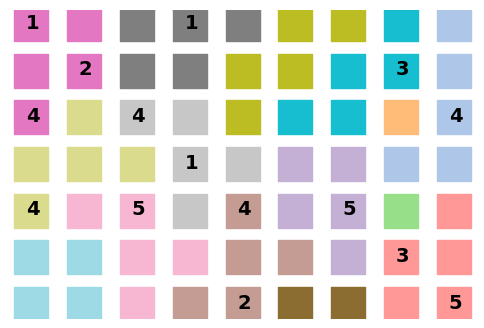

In [26]:
plt.figure(figsize=(6,4))

for pr,nodes in projects.items():
  for node in nodes:
    plt.scatter(cells[node][0],7- cells[node][1]+0.1, marker='s', s=600,  c= KOLORS[pr+5])

for (y,x),v in given.items():
    plt.text(x-0.1,7-y, s=str(v), fontsize=14, fontweight='bold', c='k')

plt.axis('off')
plt.show()


In [38]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()
U = {i:model.NewIntVar(1,len(projects[cell2proj[i]])  , f"connection_{i}") for i in cells.keys()}

for project,list_V in projects.items():
  expressions= [ U[c] for c in list_V]
  model.AddAllDifferent(expressions)

for cell1 in cells:
  for cell2 in cells:
    x1, y1= cells[cell1][0], cells[cell1][1]
    x2, y2= cells[cell2][0], cells[cell2][1]
    if cell1 !=cell2 and (x1-x2)**2 +(y1-y2)**2 <=2:
        expressions= [ U[cell1], U[cell2]]
        model.AddAllDifferent(expressions)

for (y,x),v in given.items():
  cell= loc2cells[x,y]
  model.Add(U[cell] == v)

status = solver.Solve(model)
if status == cp_model.FEASIBLE:
  print("feasible")
elif status == cp_model.OPTIMAL:
  print("optimal")
elif status == cp_model.INFEASIBLE:
  print("INFEASIBLE")
elif status == cp_model.UNKNOWN:
  print("UNKNOWN")


optimal


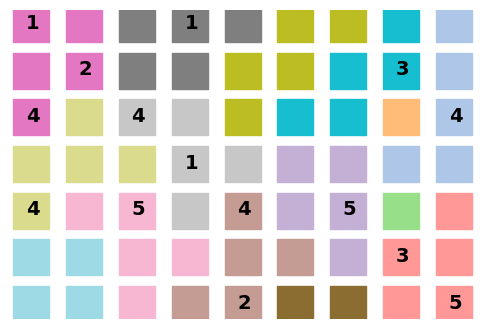

In [39]:
plt.figure(figsize=(6,4))
for (y,x),v in given.items():
    plt.scatter(x,7-y+0.1, s=500, c='gold', alpha=0.7)
    plt.text(x-0.1,7-y, s=str(v), fontsize=14, fontweight='bold', c='k')



for pr,nodes in projects.items():
  for node in nodes:
    plt.scatter(cells[node][0],7- cells[node][1]+0.1, marker='s', s=700,  c= KOLORS[pr+5])
    v = solver.value(U[node])
    x,y = cells[node]
    #plt.text(x-0.1,7-y, s=str(v), fontsize=14, fontweight='bold', c='k')


plt.axis('off')
plt.show()

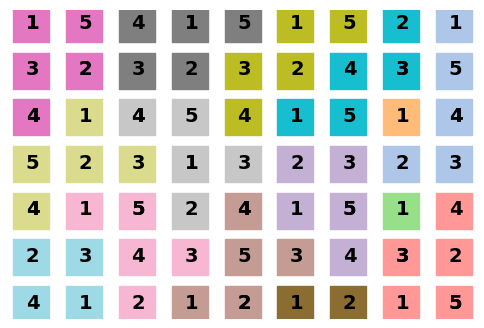

In [42]:
plt.figure(figsize=(6,4))
for (y,x),v in given.items():
    plt.scatter(x,7-y+0.1, s=500, c='gold', alpha=0.7)
    plt.text(x-0.1,7-y, s=str(v), fontsize=14, fontweight='bold', c='k')

for pr,nodes in projects.items():
  for node in nodes:
    plt.scatter(cells[node][0],7- cells[node][1]+0.1, marker='s', s=700,  c= KOLORS[pr+5])
plt.axis('off')

counter= 0
for pr,nodes in projects.items():
  for node in nodes:
    #plt.scatter(cells[node][0],7- cells[node][1]+0.1, marker='s', s=700,  c= KOLORS[pr+5])
    v = solver.value(U[node])
    x,y = cells[node]
    if (y,x) not in given.items():
      plt.text(x-0.1,7-y, s=str(v), fontsize=14, fontweight='bold', c='k')
      plt.savefig(f'/content/drive/My Drive/Colab Notebooks/img/rectangle_plot_{counter}.png')
      counter+=1


plt.show()
